# Lepton reco vs $L_{xy}$ and $\Delta R$

I want to measure the fraction of dark photon decays that result in 0, 1, or 2 (or more) electrons, photons, PF muons, and DSA muons as a function dark photon $L_xy$ and di-lepton $\Delta R$.

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

Start with low-ctau sample and just plot the number of PF muons that pass the LJ source cuts and are within dR=0.5 of a dark photon that decays to muons at gen level. Choose a few different bound state and dark photon mass combos that more or less span the possible $\Delta R$ values.

In [2]:
# ctau for Lxy = 0.3cm
samples = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_5GeV_0p4mm",
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_5GeV_0p04mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["baseNoLj"]
p = sidm_processor.SidmProcessor(
    channels,
    [
        "genA_base",
        "genMu_base",
        "genE_base",
        "lepton_genA_base",
    ],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  b

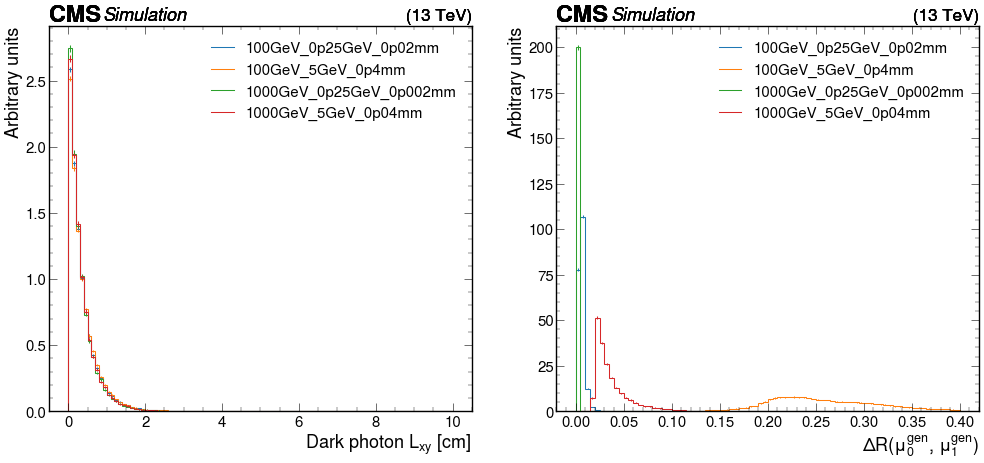

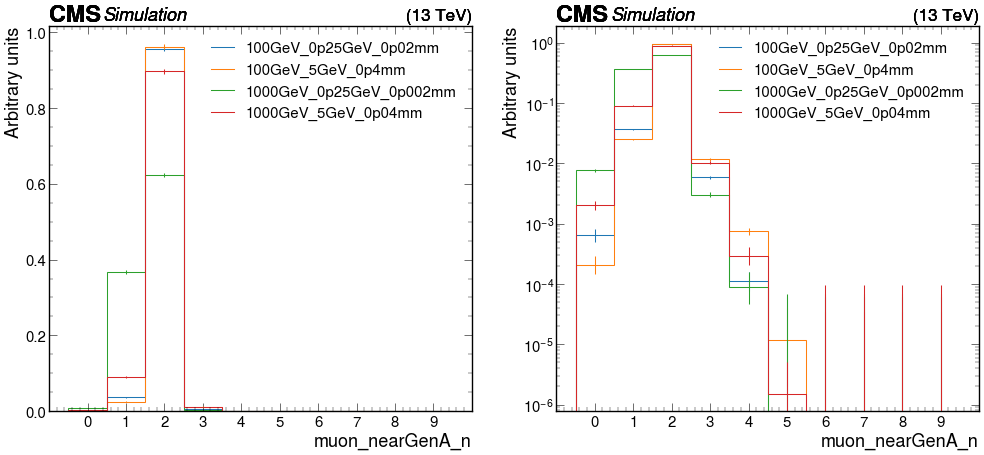

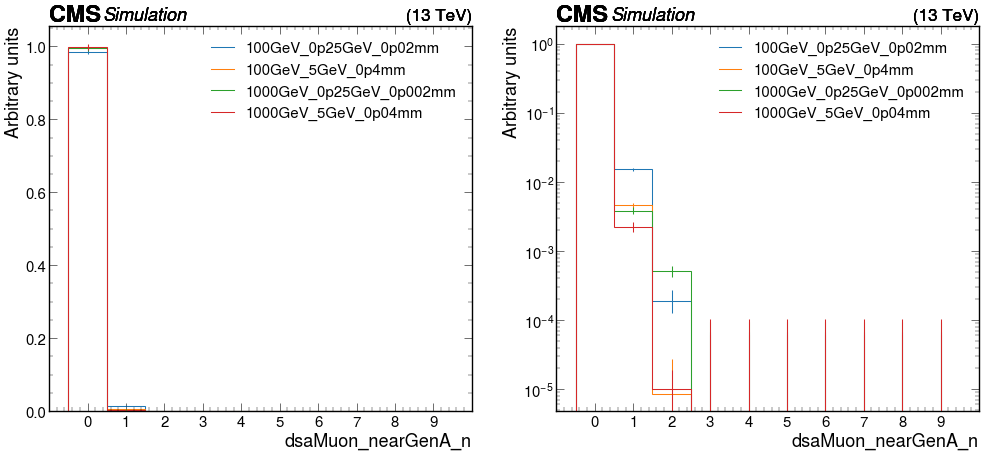

In [3]:
legend_entries = [s[6:] for s in samples]
nplots = 2

# lxy and dR for reference
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_lxy_lowRange"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu_genMu_dR_lowRange"][channels[0], :0.4j], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")

# number of muons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.yscale("log")

# number of DSA muons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["dsaMuon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["dsaMuon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.yscale("log")

Cool, so for promptly decaying dark photons, we get 2 PF muons about 95% of the time for 100GeV bound states and ~60 to 90% of the time for 1000GeV bound states. I expected the number of reco muons for promptly decaying dark photons to depend almost entirely on the gen-level di-muon $\Delta R$, but lepton pT matters apparently matters more than I expected. DSA muons are mostly irrelavant as expected.

Repeat the above exercise for electrons and photons

Text(0, 1, 'Arbitrary units')

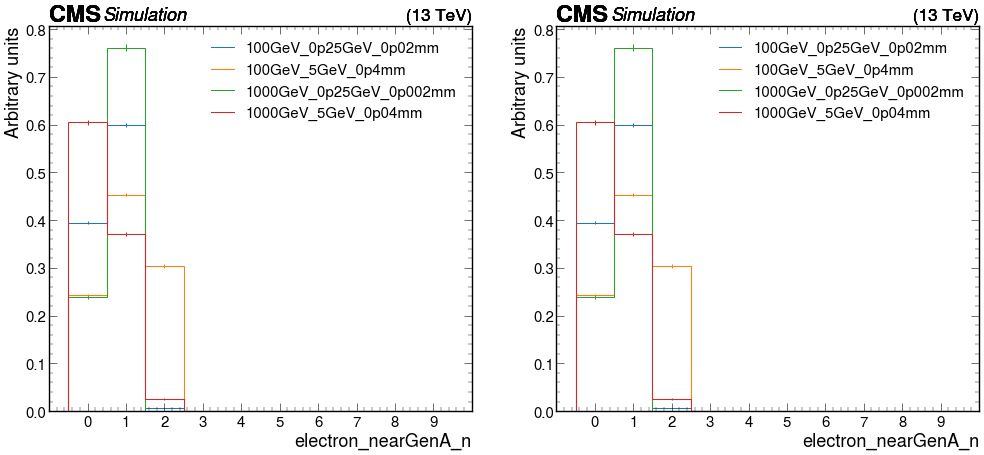

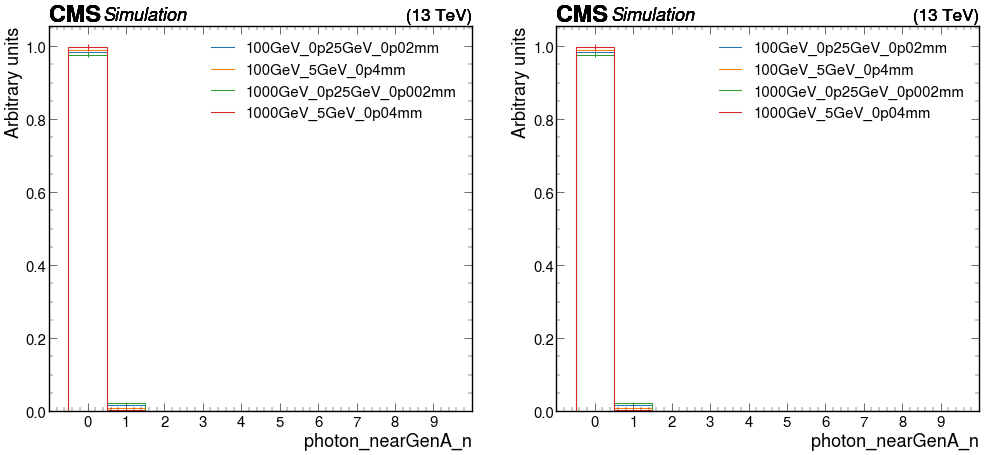

In [4]:
legend_entries = [s[6:] for s in samples]
nplots = 2

# number of electrons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")

# number of photons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")

Interesting. The fraction of dark photon decays that result in two reco electrons is low across the board. The ordering in the two-PF-electron bin makes sense (higher $\Delta R$ corresponds to higher probability of reconstructing two PF electrons). The ordering is inverted in the one-PF-electron bin -- maybe more collimated electrons increase the probability that the two gen-level electrons are reconstructed as a single electron whose energy is equal to the sum of the two electrons (assuming the energy measurement comes mostly from ECAL)? I don't understand the ordering of the zero-PF-electron bin. The photon distribution makes me wonder if more collimation increases the probability that the two electrons are reconstructed as a photon but the lowest bound state mass leads to "photons" that fail the 20GeV pT cut more frequently.

Ok, I can think of a few good next steps. Options:
- Repeat above for longer-lived dark photons
- Make 2D plots vs dark photon Lxy or gen-lepton dR
- Investigate properties of reco leptons in cases where 1 or two were reconstructed (e.g. are there any merged electrons that carry the full dark photon pT?)
- Look into summing output across signal samples so I can smoothly scan across gen-lepton dR

Start with option 1 and just repeat previous exercise for dark photons with 3, 30, and 300cm average lab-frame transverse decay length.

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  b

Text(0, 1, 'Arbitrary units')

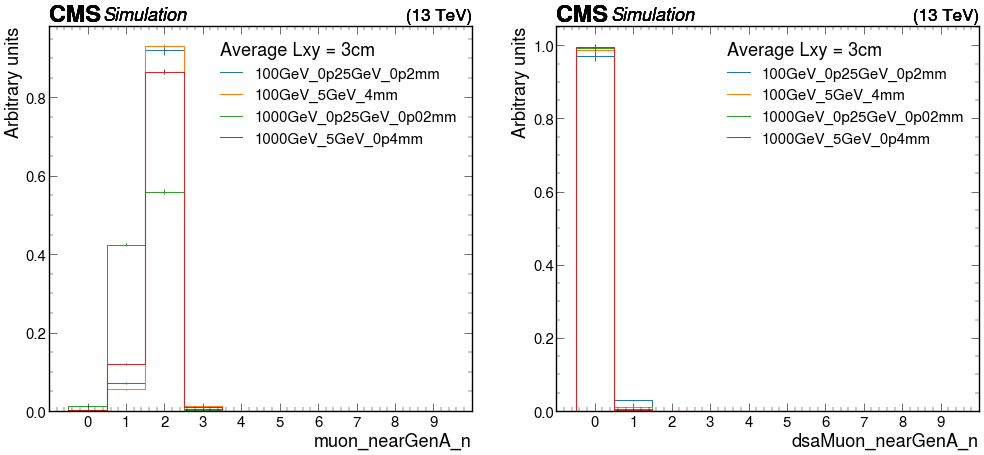

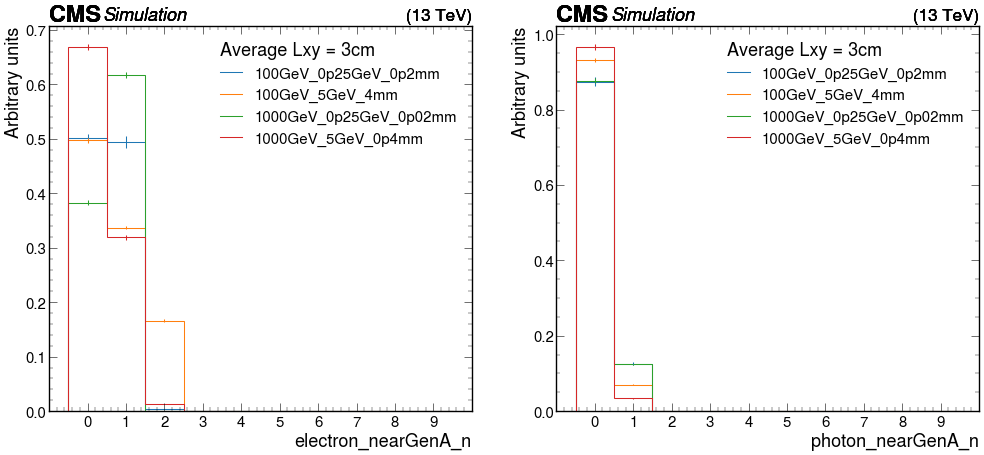

In [5]:
# ctau for Lxy = 3cm
samples_3cm = [
    "2Mu2E_100GeV_0p25GeV_0p2mm",
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_1000GeV_0p25GeV_0p02mm",
    "2Mu2E_1000GeV_5GeV_0p4mm",
]
fileset_3cm = utilities.make_fileset(samples_3cm, "ffntuple_v4")

output_3cm = runner.run(fileset_3cm, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out_3cm = output_3cm["out"]

legend_entries = [s[6:] for s in samples_3cm]
nplots = 2

# number of muons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples_3cm:
    utilities.plot(out_3cm[sample]["hists"]["muon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 3cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of DSA muons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_3cm:
    utilities.plot(out_3cm[sample]["hists"]["dsaMuon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 3cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of electrons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples_3cm:
    utilities.plot(out_3cm[sample]["hists"]["electron_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 3cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of photons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_3cm:
    utilities.plot(out_3cm[sample]["hists"]["photon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 3cm", alignment="left")
plt.ylabel("Arbitrary units")

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  b

Text(0, 1, 'Arbitrary units')

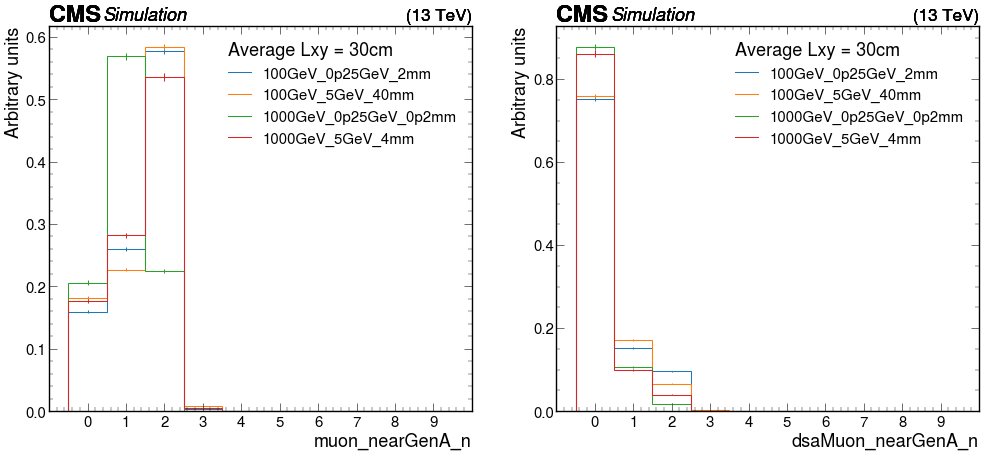

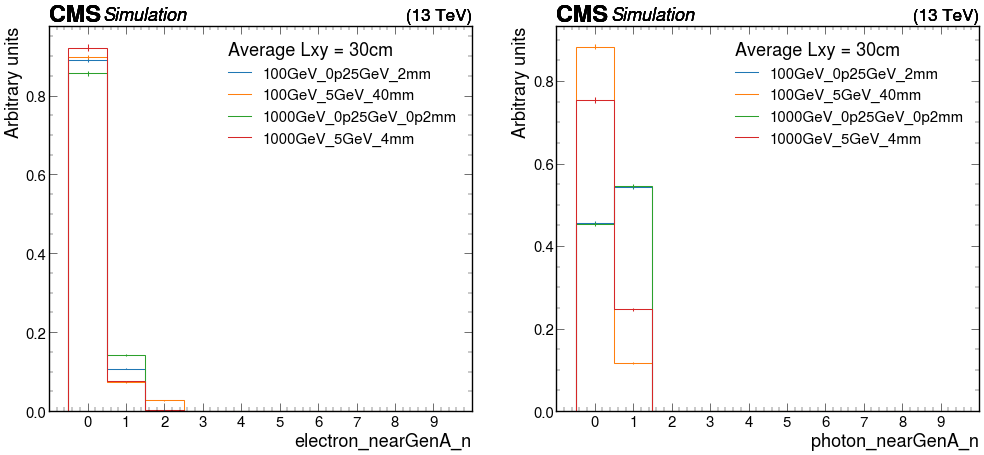

In [6]:
# ctau for Lxy = 30cm
samples_30cm = [
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_5GeV_40mm",
    "2Mu2E_1000GeV_0p25GeV_0p2mm",
    "2Mu2E_1000GeV_5GeV_4mm",
]
fileset_30cm = utilities.make_fileset(samples_30cm, "ffntuple_v4")

output_30cm = runner.run(fileset_30cm, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out_30cm = output_30cm["out"]

legend_entries = [s[6:] for s in samples_30cm]
nplots = 2

plt.subplots(1, nplots, figsize=(nplots*12, 10))
# number of muons near dark photon
plt.subplot(1, nplots, 1)
for sample in samples_30cm:
    utilities.plot(out_30cm[sample]["hists"]["muon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 30cm", alignment="left")
plt.ylabel("Arbitrary units")
# number of DSA muons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_30cm:
    utilities.plot(out_30cm[sample]["hists"]["dsaMuon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 30cm", alignment="left")
plt.ylabel("Arbitrary units")

plt.subplots(1, nplots, figsize=(nplots*12, 10))
# number of electrons near dark photon
plt.subplot(1, nplots, 1)
for sample in samples_30cm:
    utilities.plot(out_30cm[sample]["hists"]["electron_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 30cm", alignment="left")
plt.ylabel("Arbitrary units")
# number of photons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_30cm:
    utilities.plot(out_30cm[sample]["hists"]["photon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 30cm", alignment="left")
plt.ylabel("Arbitrary units")

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  b

Text(0, 1, 'Arbitrary units')

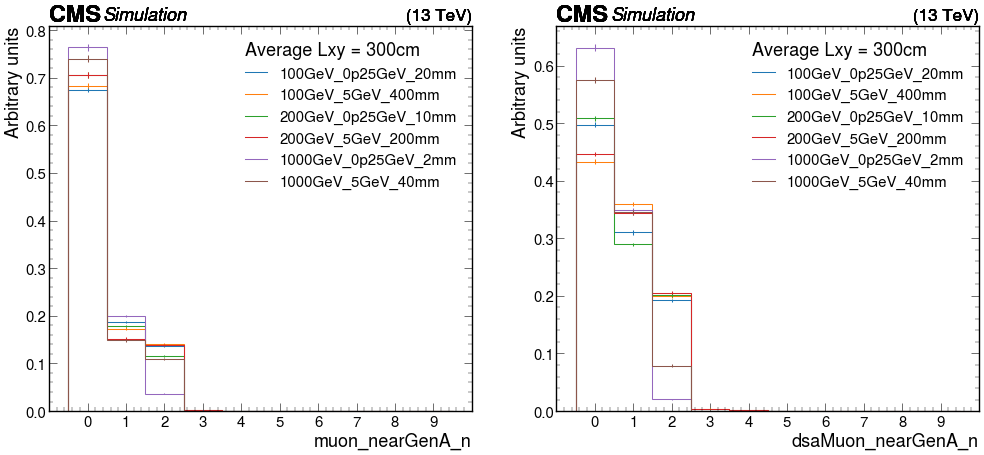

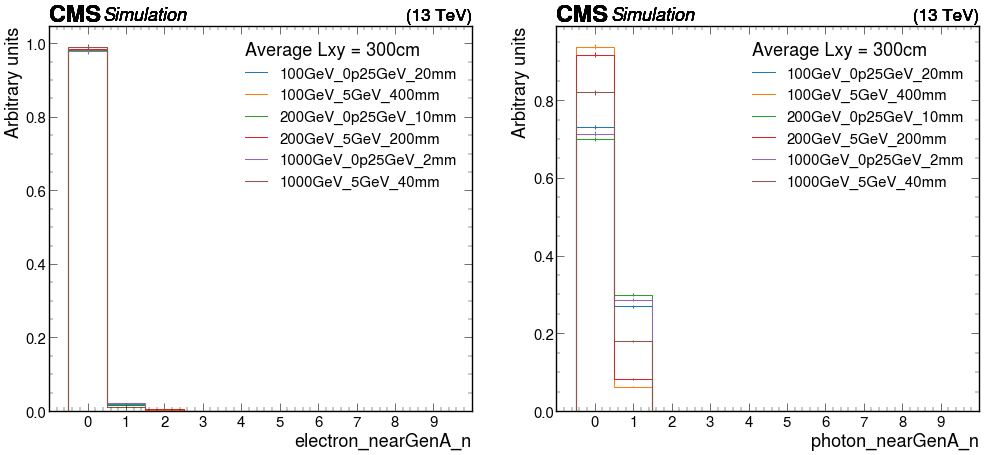

In [9]:
# ctau for Lxy = 300cm
samples_300cm = [
    "2Mu2E_100GeV_0p25GeV_20mm",
    "2Mu2E_100GeV_5GeV_400mm",
    "2Mu2E_200GeV_0p25GeV_10mm",
    "2Mu2E_200GeV_5GeV_200mm",
    "2Mu2E_1000GeV_0p25GeV_2mm",
    "2Mu2E_1000GeV_5GeV_40mm",
]
fileset_300cm = utilities.make_fileset(samples_300cm, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

output_300cm = runner.run(fileset_300cm, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out_300cm = output_300cm["out"]

legend_entries = [s[6:] for s in samples_300cm]
nplots = 2

# number of muons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples_300cm:
    utilities.plot(out_300cm[sample]["hists"]["muon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 300cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of DSA muons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_300cm:
    utilities.plot(out_300cm[sample]["hists"]["dsaMuon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 300cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of electrons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples_300cm:
    utilities.plot(out_300cm[sample]["hists"]["electron_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 300cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of photons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_300cm:
    utilities.plot(out_300cm[sample]["hists"]["photon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 300cm", alignment="left")
plt.ylabel("Arbitrary units")

Observations:
- $\geq$2 photon reconstructions don't happen
- $\geq$2 DSA muon reconstructions are much more rare than I would expect

Would probably be good to plot these as a function of dark photon Lxy for a couple mass points. Maybe I can make 4 separate 2D hists then do some mpl magic to align them such that they share a single Lxy axis. Start with just the 2D plots

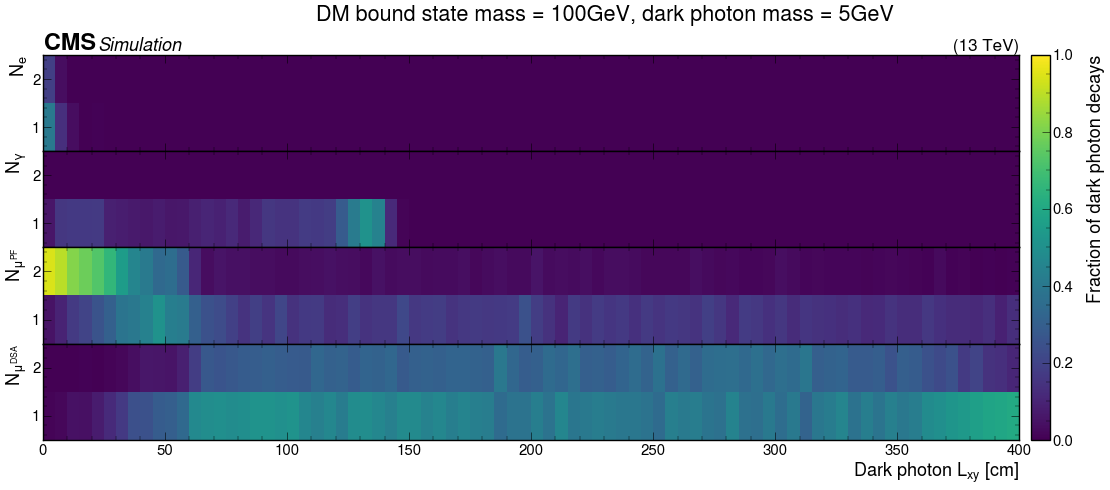

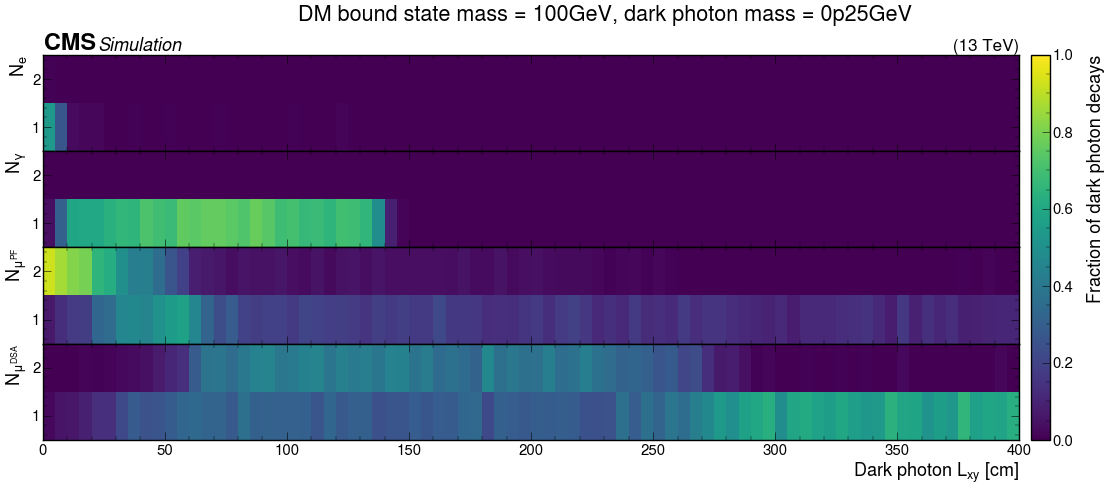

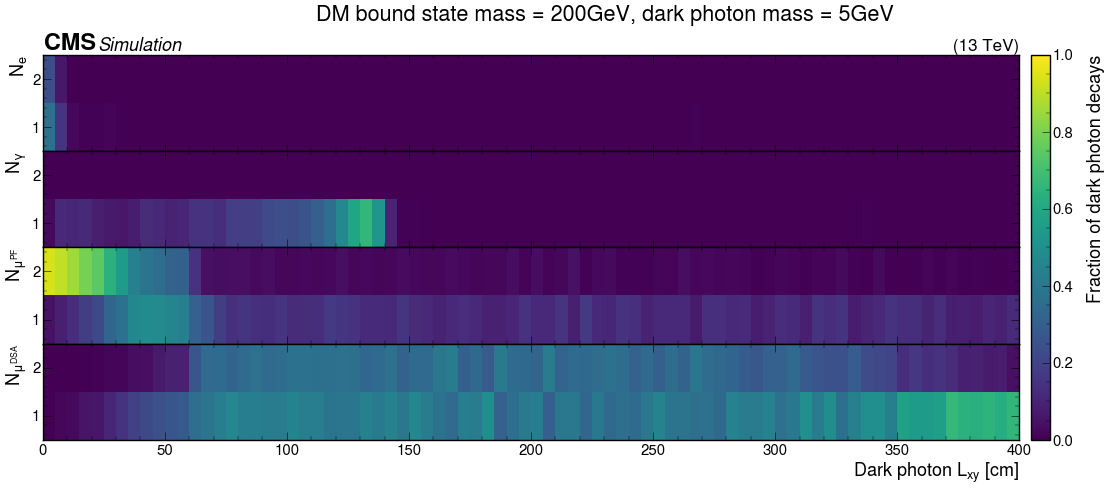

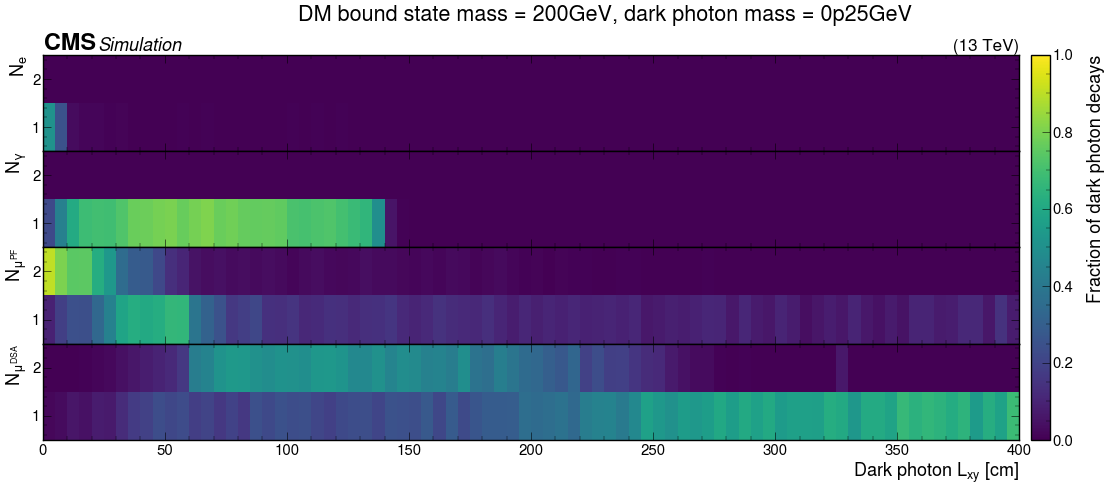

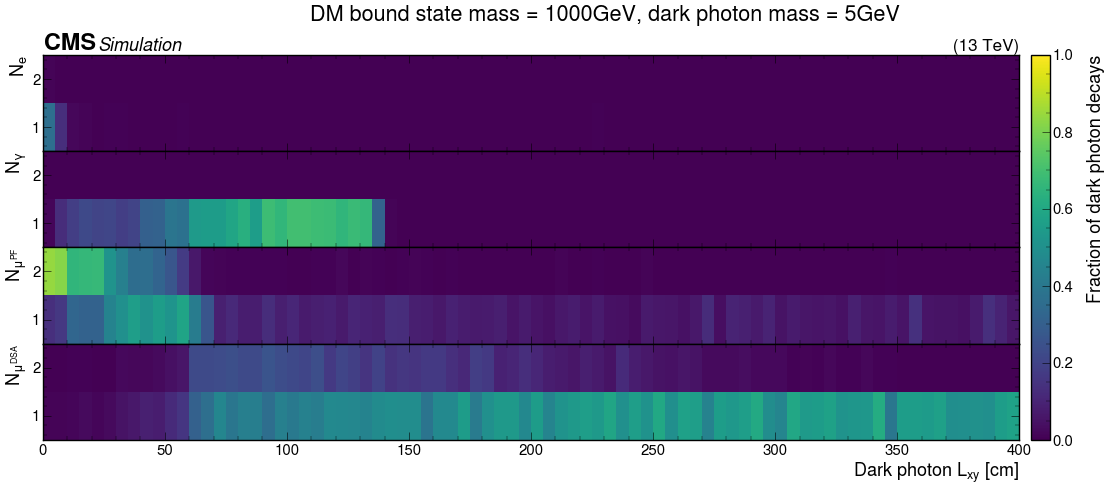

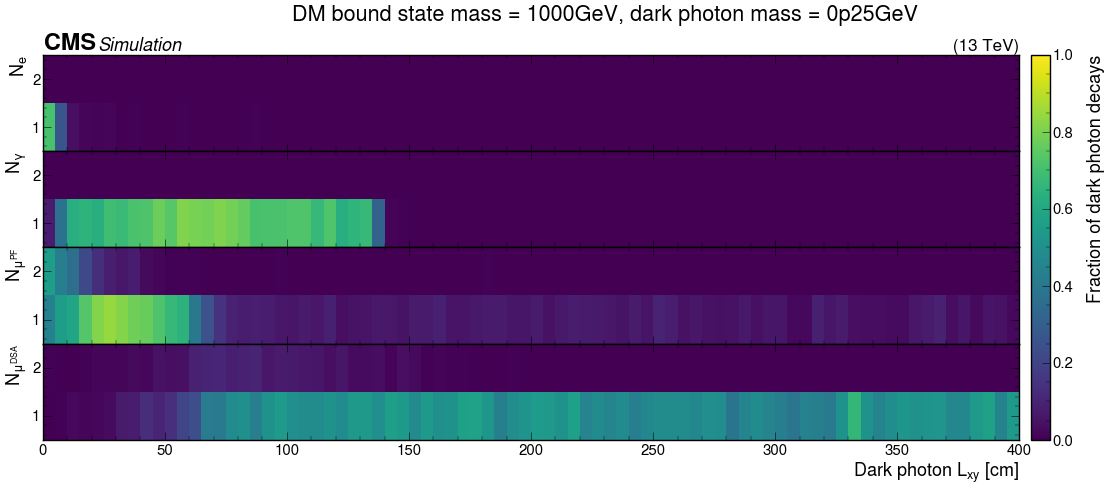

In [24]:
import numpy as np

def make_eff(h):
    weights = 1/np.sum(h.values(), axis=-1)
    weights = np.nan_to_num(weights)
    for ix in range(h.shape[1]):
        h[:, ix] = np.column_stack([h.values()[:, ix]*weights, h.variances()[:, ix]*weights])
    return h

def plot_single(h, vmax, eff, skip_label=True, remove_xlabel=True):
    h = h[channels[0], :, :]
    if eff:
        h = make_eff(h)
    utilities.plot(h[:400j, 1:3], skip_label=skip_label, vmax=vmax, cbar=False)
    if remove_xlabel:
        plt.xlabel(None)
    plt.draw()
    

def plot_all_vs_lxy(proc_output, sample, vmax=1000, eff=True, suffix=""):
    vmax = 1 if eff else vmax

    fig, ax = plt.subplots(4, 1, figsize=(30, 10), sharex=True)
    plt.subplot(4, 1, 1)
    plot_single(proc_output[sample]["hists"]["electron_nearGenA_n_genA_lxy"], eff, vmax, skip_label=False)
    plt.subplot(4, 1, 2)
    plot_single(proc_output[sample]["hists"]["photon_nearGenA_n_genA_lxy"], eff, vmax)
    plt.subplot(4, 1, 3)
    plot_single(proc_output[sample]["hists"]["muon_nearGenA_n_genA_lxy"], eff, vmax)
    plt.subplot(4, 1, 4)
    plot_single(proc_output[sample]["hists"]["dsaMuon_nearGenA_n_genA_lxy"], eff, vmax, remove_xlabel=False)
    
    fig.subplots_adjust(hspace=0)
    bs_mass, dp_mass = sample.split("_")[1:3]
    dp_mass.replace("p", ".")
    fig.suptitle(f"DM bound state mass = {bs_mass}, dark photon mass = {dp_mass}")
    cb = fig.colorbar(plt.gca().collections[0], ax=ax.ravel().tolist(), pad=0.01)
    cb.set_label("Fraction of dark photon decays", labelpad=20)
    
    plt.savefig(f"../../plots/lepton_reco_vs_lxy_{sample}{suffix}.png", bbox_inches="tight")

plot_all_vs_lxy(out_300cm, "2Mu2E_100GeV_5GeV_400mm")
plot_all_vs_lxy(out_300cm, "2Mu2E_100GeV_0p25GeV_20mm")
plot_all_vs_lxy(out_300cm, "2Mu2E_200GeV_5GeV_200mm")
plot_all_vs_lxy(out_300cm, "2Mu2E_200GeV_0p25GeV_10mm")
plot_all_vs_lxy(out_300cm, "2Mu2E_1000GeV_5GeV_40mm")
plot_all_vs_lxy(out_300cm, "2Mu2E_1000GeV_0p25GeV_2mm")


Hmm, the difference N_photon between 0.25 and 5GeV dark photons for the 100GeV bound state is interesting. I wonder if the electrons are separated enough in the 5GeV case to mess up the single-photon reco but not enough to be reconstructed as two photons. I think we might need to grapple with the fact that most of our displaced lepton jets are just one photon or just one DSA muon. Note that these plots are normalized such that each column each of the 4 separate plots that combine to make one full plot.

Next, remake above plots without applying ljsource cuts.

In [28]:
channels = ["pvAndCosmic_cuts"]
p = sidm_processor.SidmProcessor(
    channels,
    ["lepton_genA_base"],
)

output_300cm_noLjSourceCuts = runner.run(fileset_300cm, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out_300cm_noLjSourceCuts = output_300cm_noLjSourceCuts["out"]

Output()

Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not ap

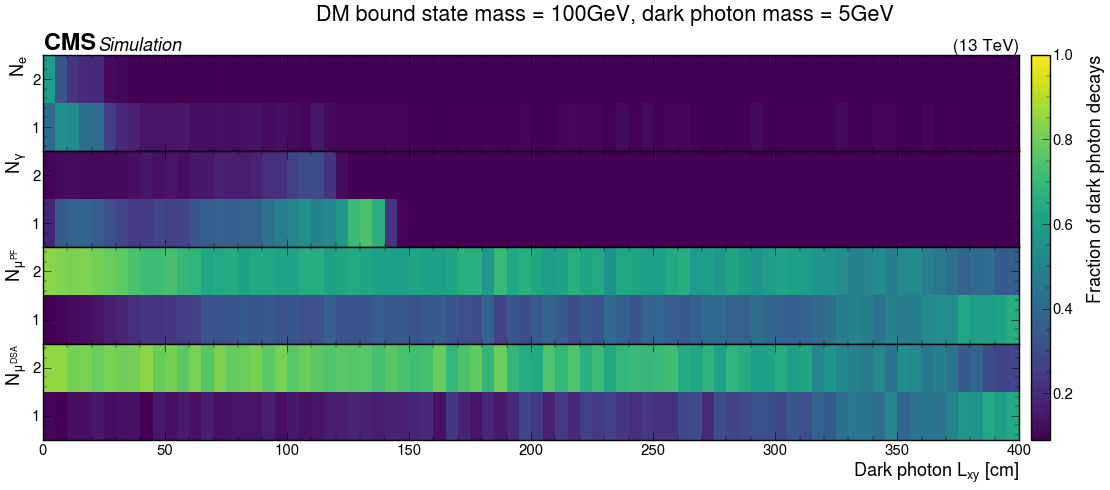

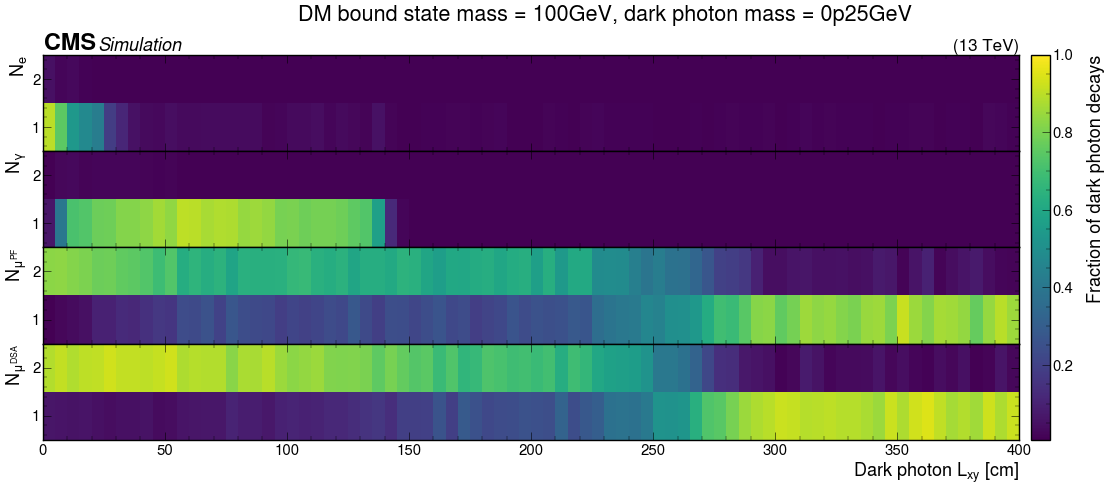

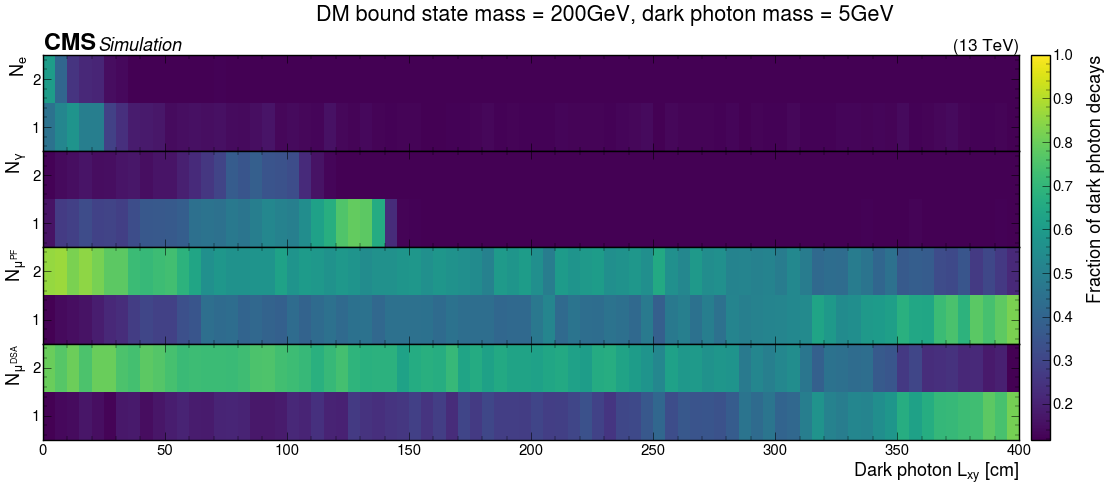

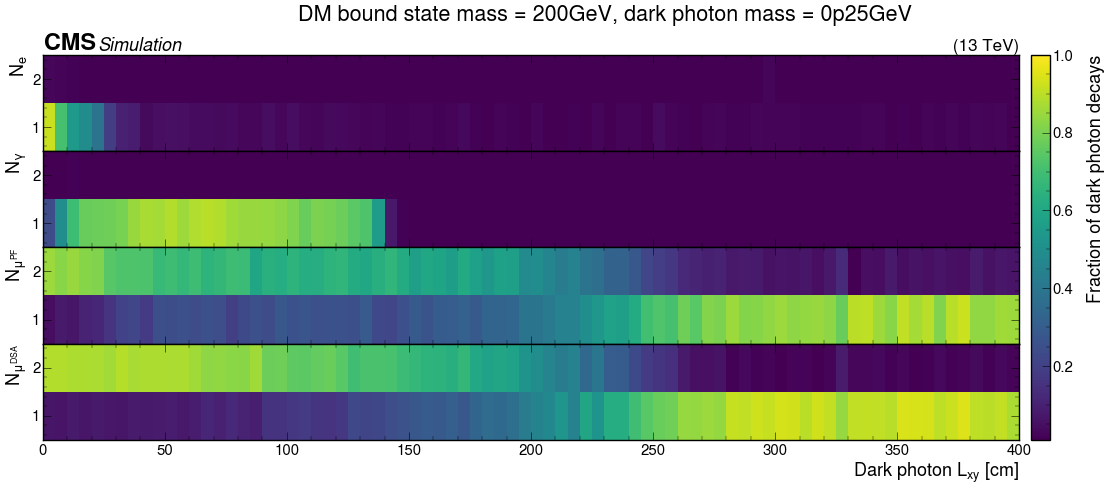

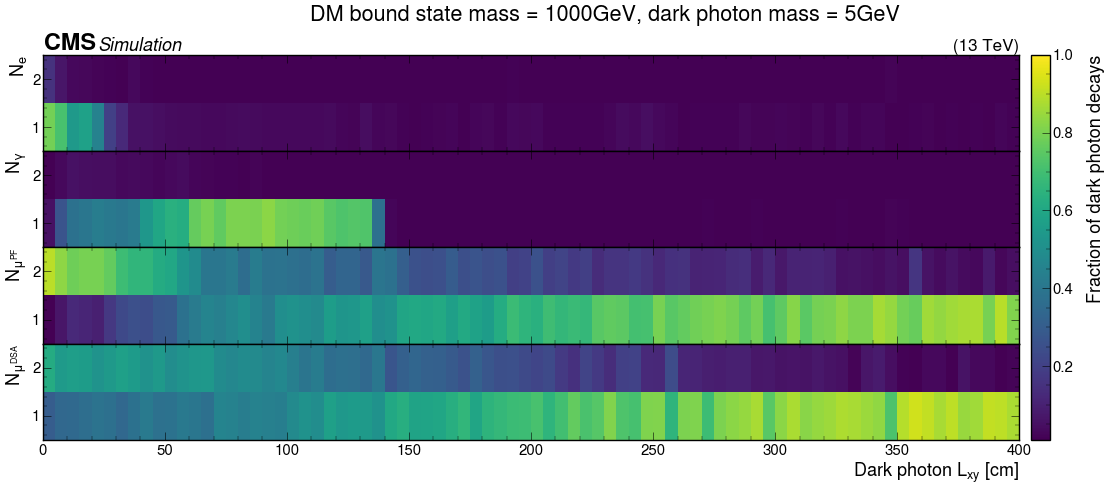

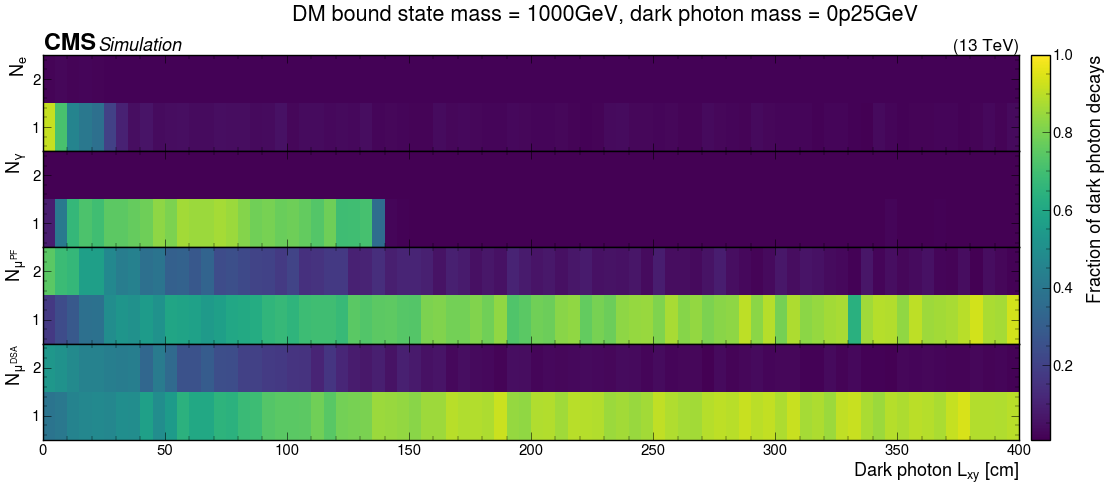

In [29]:
plot_all_vs_lxy(out_300cm_noLjSourceCuts, "2Mu2E_100GeV_5GeV_400mm", suffix="_noLjSourceCuts")
plot_all_vs_lxy(out_300cm_noLjSourceCuts, "2Mu2E_100GeV_0p25GeV_20mm", suffix="_noLjSourceCuts")
plot_all_vs_lxy(out_300cm_noLjSourceCuts, "2Mu2E_200GeV_5GeV_200mm", suffix="_noLjSourceCuts")
plot_all_vs_lxy(out_300cm_noLjSourceCuts, "2Mu2E_200GeV_0p25GeV_10mm", suffix="_noLjSourceCuts")
plot_all_vs_lxy(out_300cm_noLjSourceCuts, "2Mu2E_1000GeV_5GeV_40mm", suffix="_noLjSourceCuts")
plot_all_vs_lxy(out_300cm_noLjSourceCuts, "2Mu2E_1000GeV_0p25GeV_2mm", suffix="_noLjSourceCuts")